Intervalas: [-2.697513419824549; 4.937984496124031]

1) [-1.097513; -0.997513]
Šaknų tikslinimas stygų ir niutono (liestinių) metodu:
Stygų rez:   -1.0603727932711937
Niutono rez: -1.0603727933017841
Stygų funkcijos reikšmė ties šaknimi:   4.525881891481731e-10
Niutono funkcijos reikšmė ties šaknimi: -2.4582380575566276e-10
Tikslumas: 1e-09
Iteracijų skaičius stygų:   7
Iteracijų skaičius niutono: 3

2) [0.602487; 0.702487]
Šaknų tikslinimas stygų ir niutono (liestinių) metodu:
Stygų rez:   0.6494305349810486
Niutono rez: 0.6494305348708012
Stygų funkcijos reikšmė ties šaknimi:   -5.237676958813609e-10
Niutono funkcijos reikšmė ties šaknimi: 1.4303225270850817e-11
Tikslumas: 1e-09
Iteracijų skaičius stygų:   6
Iteracijų skaičius niutono: 6

3) [1.802487; 1.902487]
Šaknų tikslinimas stygų ir niutono (liestinių) metodu:
Stygų rez:   1.8383683864541727
Niutono rez: 1.8383683864491867
Stygų funkcijos reikšmė ties šaknimi:   1.49018575257287e-11
Niutono funkcijos reikšmė ties šaknimi: 0.0
T

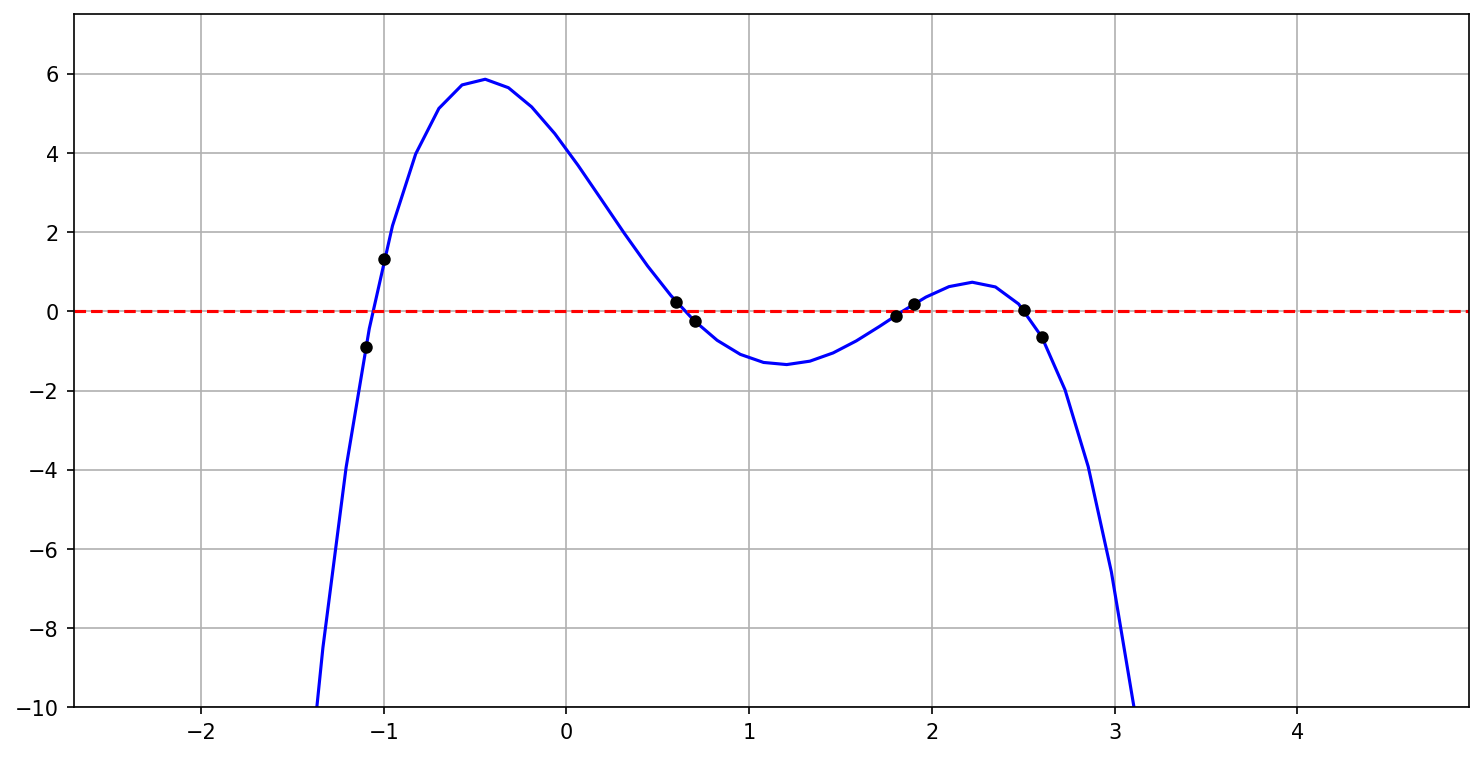

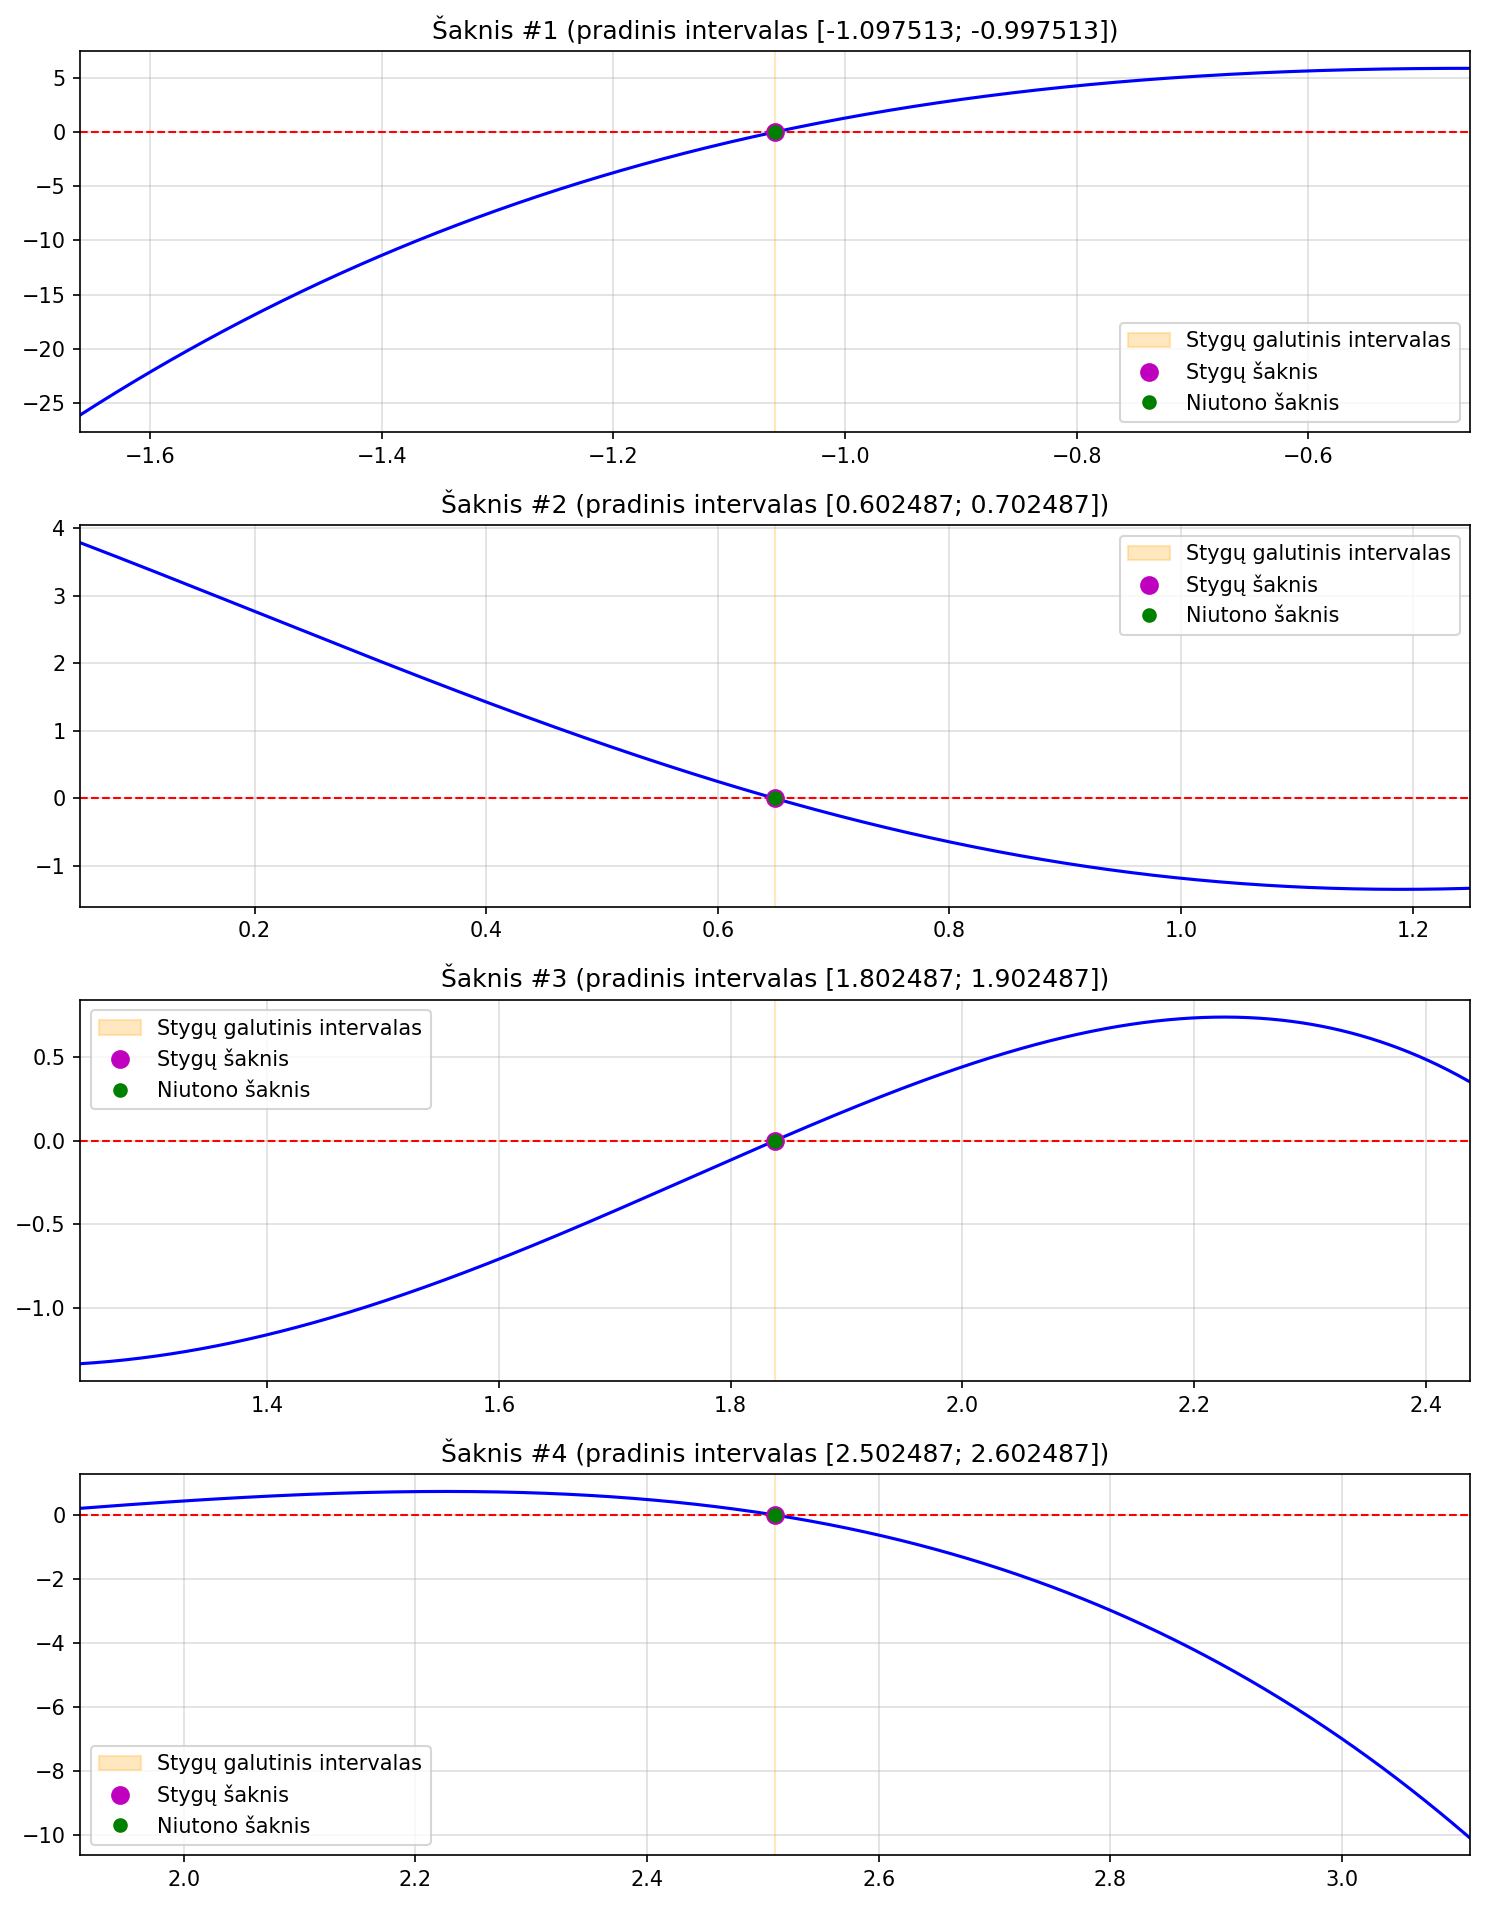

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

def func(x):
    return -1.29 * x**4 + 5.08 * x**3 - 2.76 * x**2 - 6.31 * x + 4.10

Bteig = 5.08
kteig = 4 - 3
end = 1 + (Bteig / 1.29)**(1/kteig)

Bneig = 6.31
kneig = 4 - 1
start = -1 * (1 + (Bneig / 1.29)**(1/kneig))

pi=math.pi
xxx=np.linspace(-2*pi, 2*pi, 100);
fff=func(xxx);

plt.figure(figsize=(12, 6), dpi=150)
plt.plot(xxx,fff,'b-');plt.grid();
plt.axhline(0, color='red', linestyle='--')
plt.ylim([-10, 7.5])
plt.xlim([start, end])

#zingsnis
#tikslumas
#saknu intervalai
#steps - iteraciju skaicius
h = 0.1
accuracy  = 1e-9
intervalai = []
steps1 = 0
steps2 = 0

xleft = start
yleft = func(xleft)

while xleft < end - 1e-12:
    xright = min(xleft + h, end)
    yright = func(xright)

    if yleft * yright < 0:
        intervalai.append((xleft, xright))
        plt.plot([xleft, xright], [func(xleft), func(xright)], 'ko', markersize=5)

    xleft, yleft = xright, yright

print(f"Intervalas: [{start}; {end}]")

roots_summary = []

if intervalai:
    for i, (a, b) in enumerate(intervalai, 1):
        print(f"\n{i}) [{a:.6f}; {b:.6f}]")
        a1 = a
        b1 = b
        
        print("Šaknų tikslinimas stygų ir niutono (liestinių) metodu:")
        #stygu metodas
        fa, fb = func(a), func(b)
        #jei saknis yra intervalo pradzia arba pabaiga
        if fa == 0:
            rez1 = a
            steps1 = 0
        elif fb == 0:
            rez1 = b
            steps1 = 0
        else:
            steps1 = 0

            #pirminis plotis/tikslumas
            prev_width = abs(b - a)
            #blogejimo parametrai
            no_improve = 0
            max_stall = 5
            epsw = 1e-15

            #kol nepasiektas reikiamas tikslumas
            while abs(b - a) > accuracy:
                #c tai taskas kur styga kerta x asi
                c = a - fa * (b - a) / (fb - fa)
                fc = func(c)
                steps1 += 1

                if abs(fc) <= accuracy:
                    a = b = c
                    break

                #tikrina tarp kuriu tasku yra saknis
                if fa * fc < 0:
                    b, fb = c, fc
                else:
                    a, fa = c, fc

                width = abs(b - a)

                #tikrina ar neblogeja
                if width >= prev_width - epsw:
                    no_improve += 1
                else:
                    no_improve = 0
                
                prev_width = width

                #kai uzstringam arba negerejam - neprogresuojam (plotis nemazeja arba mazeja labai letai)
                #kai toks dalykas trunka max_stall zingsniu skaiciu
                #tada paimam intervalo viduri ir skatiname konvergacija
                if no_improve >= max_stall:
                    m = 0.5 * (a + b)
                    fm = func(m)
                    steps1 += 1

                    if fa * fm < 0:
                        b, fb = m, fm
                    else:
                        a, fa = m, fm

                    no_improve = 0

                #apsisaugojimas nuo dalybos is nulio
                if fb == fa:
                    break

            # rez1 = a if abs(func(a)) < abs(func(b)) else b
            rez1 = (a + b) / 2

        #pirmasis spejimo taskas
        #maximalus iteraciju skaicius
        rez2 = a1
        max_iter = 1000
        steps2 = 0

        #niutono liestiniu metodas
        while steps2 < max_iter:
            #funkcijos reiksme ties spejimo tasku
            fx = func(rez2)

            #jei spejimas yra pakankamai tikslus radome rezultata
            if abs(fx) <= accuracy:
                break

            #funkcijos isvestine - niutono formulei reikalinga
            dfx = -5.16 * rez2**3 + 15.24 * rez2**2 - 5.52 * rez2 - 6.31

            #negalim testi nes bus dalyba is nulio
            if dfx == 0:
                break

            #gaunamas naujas spejimo taskas ten kur liestine kirto x asi
            xnew = rez2 - fx / dfx

            #apsauga divergacijos atveju
            #jei spejimas iseina is intervalo ribu ar nauja reiksme padidino klaida
            #vietoje gauto spejimo tasko imamas intervalo vidurio taskas
            if (xnew < a1 or xnew > b1) or (abs(func(xnew)) > abs(fx)):
                xnew = 0.5 * (a1 + b1)

            #atnaujinamas spejimas ir iteraciju skaicius
            rez2 = xnew
            steps2 += 1

        a_end, b_end = min(a, b), max(a, b)
        roots_summary.append({
            "a1": a1, "b1": b1,
            "a_end": a_end, "b_end": b_end,
            "rez1": rez1, "rez2": rez2
        })

        print(f"Stygų rez:   {rez1}")
        print(f"Niutono rez: {rez2}")
        print(f"Stygų funkcijos reikšmė ties šaknimi:   {func(rez1)}")
        print(f"Niutono funkcijos reikšmė ties šaknimi: {func(rez2)}")
        print(f"Tikslumas: {accuracy}")
        print(f"Iteracijų skaičius stygų:   {steps1}")
        print(f"Iteracijų skaičius niutono: {steps2}")

if roots_summary:
    n = len(roots_summary)
    fig, axes = plt.subplots(n, 1, figsize=(10, 3.2*n), dpi=150, squeeze=False)
    axes = axes.ravel()

    for i, info in enumerate(roots_summary):
        a0, b0 = info["a1"], info["b1"]
        a_end, b_end = info["a_end"], info["b_end"]
        r1, r2 = info["rez1"], info["rez2"]

        center = r1
        dx = 0.6
        xs = np.linspace(center - dx, center + dx, 1000)
        ys = func(xs)

        ax = axes[i]
        ax.plot(xs, ys, 'b-')
        ax.grid(True, alpha=0.4)
        ax.axhline(0, color='red', linestyle='--', linewidth=1)

        ax.axvspan(a_end, b_end, color='orange', alpha=0.25, label='Stygų galutinis intervalas')

        ax.plot(r1, func(r1), 'mo', markersize=8, label='Stygų šaknis')
        ax.plot(r2, func(r2), 'go', markersize=6, label='Niutono šaknis')

        ax.set_title(f"Šaknis #{i+1} (pradinis intervalas [{a0:.6f}; {b0:.6f}])")
        ax.set_xlim(center - dx, center + dx)

        ax.legend(loc='best')

    plt.tight_layout()
    plt.show()
